In [1]:
%reset -f

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [2]:
# generate the datapoints and select centroids at random from the datapoints

numClusters = 4
numPoints = 2000
numIters = 20

xmin = -10.0
xmax = 10.0
x = xmin + (xmax-xmin)*np.random.rand(numPoints,2)

clusterAssign = np.zeros(x.shape[0])

idx = np.random.randint(0,x.shape[0]-1, numClusters)
ctrds = x[idx,:]

In [3]:
# define functions needed for cluster and centroid assignments

def assignClusters(dataPoint, centroids):
    distList = []
    for c in centroids:
        distList.append(sum((c-dataPoint)**2)**0.5)
    return  distList.index(min(distList))

def getCentroids(clusterAssign, allDataPoints):
    clusterIndices = list(set(clusterAssign))
    for i in clusterIndices:
        thisClusterPoints = allDataPoints[clusterAssign==i]
        ctrds[i,0] = np.mean(thisClusterPoints[:,0])
        ctrds[i,1] = np.mean(thisClusterPoints[:,1])

In [4]:
# carry out the initial cluster and centroid assignments
clusterAssign = np.array([assignClusters(x[i,:], ctrds) for i in range(x.shape[0])])

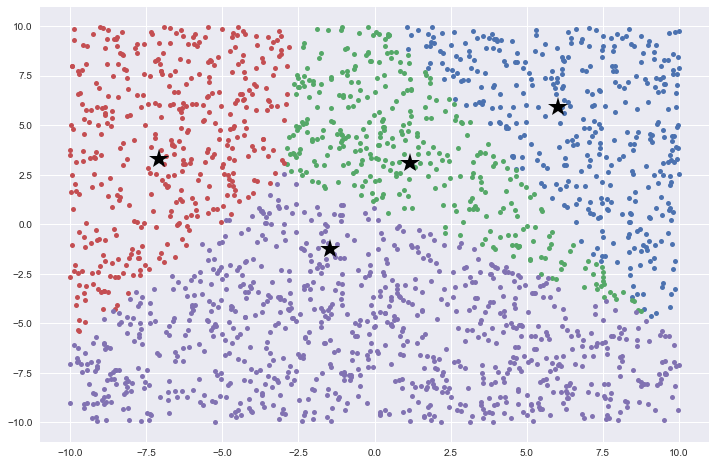

In [5]:
# plot the raw data

plt.figure(figsize=[12,8])

for i in set(clusterAssign):
    xx = x[clusterAssign==i]
    plt.plot(xx[:,0], xx[:,1], '.', markersize = 10)
    
plt.plot(ctrds[:,0], ctrds[:,1], 'k*', markersize = 20)
plt.show()

In [6]:
# iteratively assign clusters and get new centroids

for i in range(numIters):
    getCentroids(clusterAssign, x)
    clusterAssign = np.array([assignClusters(x[i,:], ctrds) for i in range(x.shape[0])])

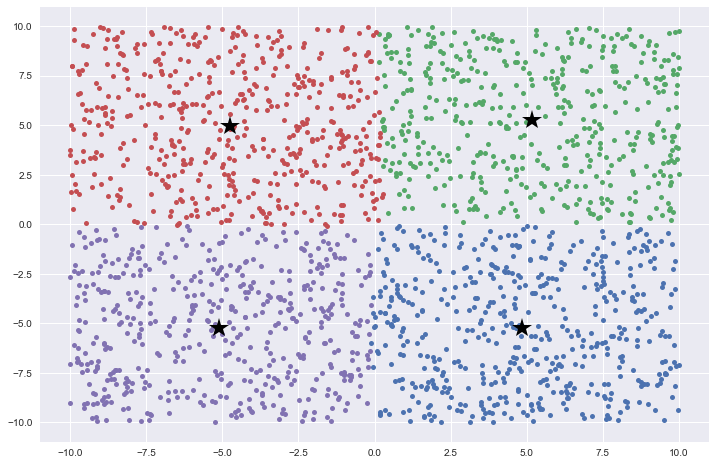

In [7]:
# plot the clustered data

plt.figure(figsize=[12,8])

for i in set(clusterAssign):
    xx = x[clusterAssign==i]
    plt.plot(xx[:,0], xx[:,1], '.', markersize = 10)
    
plt.plot(ctrds[:,0], ctrds[:,1], 'k*', markersize = 20)
plt.show()